# Data Discovery

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Data Understanding

https://opentransportdata.swiss/de/dataset/istdaten

In [4]:
# Read raw file
data_all = pd.read_csv('Data/2019-09-13istdaten.csv', sep=';', encoding='utf8', low_memory=False)

In [5]:
# Look at data integrity and size
data_all.count()

BETRIEBSTAG            1767703
FAHRT_BEZEICHNER       1767703
BETREIBER_ID           1767703
BETREIBER_ABK          1767703
BETREIBER_NAME         1767703
PRODUKT_ID             1745083
LINIEN_ID              1767703
LINIEN_TEXT            1767638
UMLAUF_ID              1008488
VERKEHRSMITTEL_TEXT    1246266
ZUSATZFAHRT_TF         1767703
FAELLT_AUS_TF          1767703
BPUIC                  1767703
HALTESTELLEN_NAME      1714678
ANKUNFTSZEIT           1662588
AN_PROGNOSE            1638041
AN_PROGNOSE_STATUS     1767703
ABFAHRTSZEIT           1664056
AB_PROGNOSE            1639386
AB_PROGNOSE_STATUS     1767703
DURCHFAHRT_TF          1767703
dtype: int64

In [6]:
# Produkt_ID seems to be containing information about the type of public transport
data_all['PRODUKT_ID'].value_counts()

Bus       1122562
Tram       244002
BUS        217098
Zug        156628
Metro        4394
Schiff        399
Name: PRODUKT_ID, dtype: int64

In [7]:
def plot_value_counts_pie_chart(df_col, title_upperpart):
    """
    function takes a column of a dataframe as input and makes a pie chart out of it,
    based on the value_counts function. title_upperpart is also provided to give the 
    plto a title
    """
    plt.figure()
    df_size = len(df_col)
    df_col.value_counts().plot(
        kind='pie',
        explode=explode,
        y=df_col.value_counts().values,
        legend=False,
        autopct='%1.1f%%',
        startangle=0,
        shadow=False,
        label='',
        title=title_upperpart + ', \n total: ' + str(df_size) +
        ' stops (13th September 2019)',
        figsize=(10, 10))

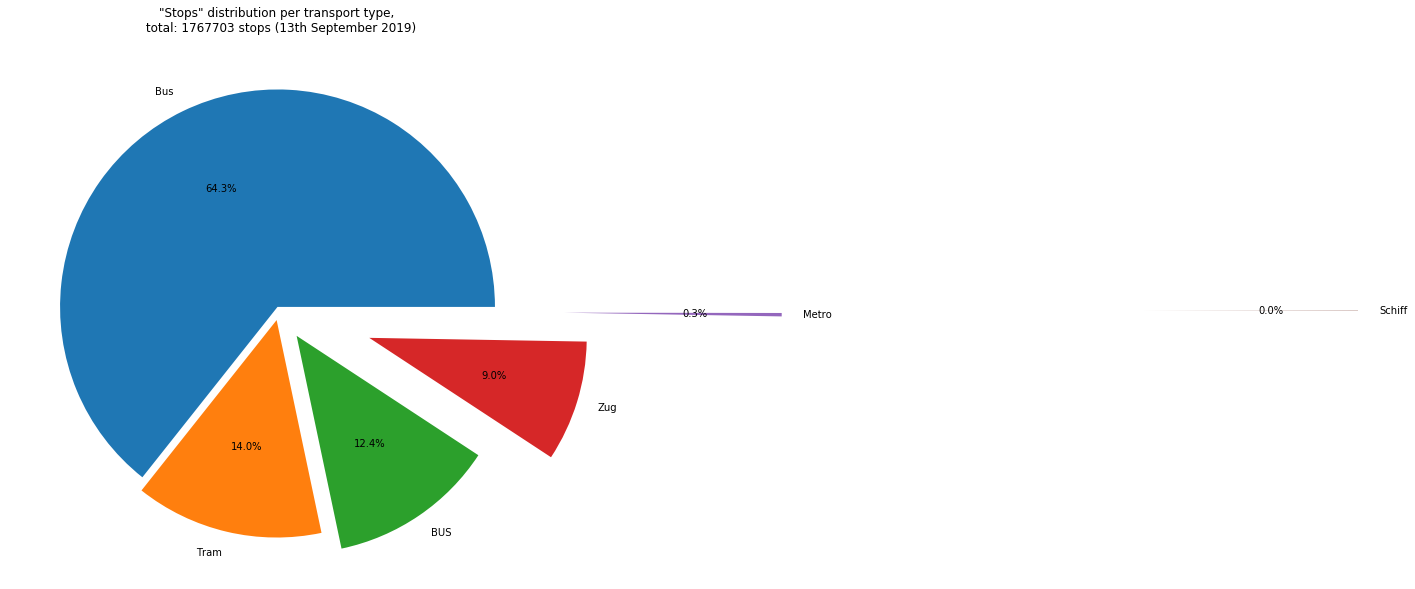

In [113]:
explode = list(np.true_divide(np.logspace(-1.2, 1.2, data_all['PRODUKT_ID'].value_counts().shape[0]),4))
plot_value_counts_pie_chart(data_all['PRODUKT_ID'], '"Stops" distribution per transport type');

In [9]:
# Keep only trains data (Zug is train in german)
data_train = data_all[data_all['PRODUKT_ID']=='Zug']

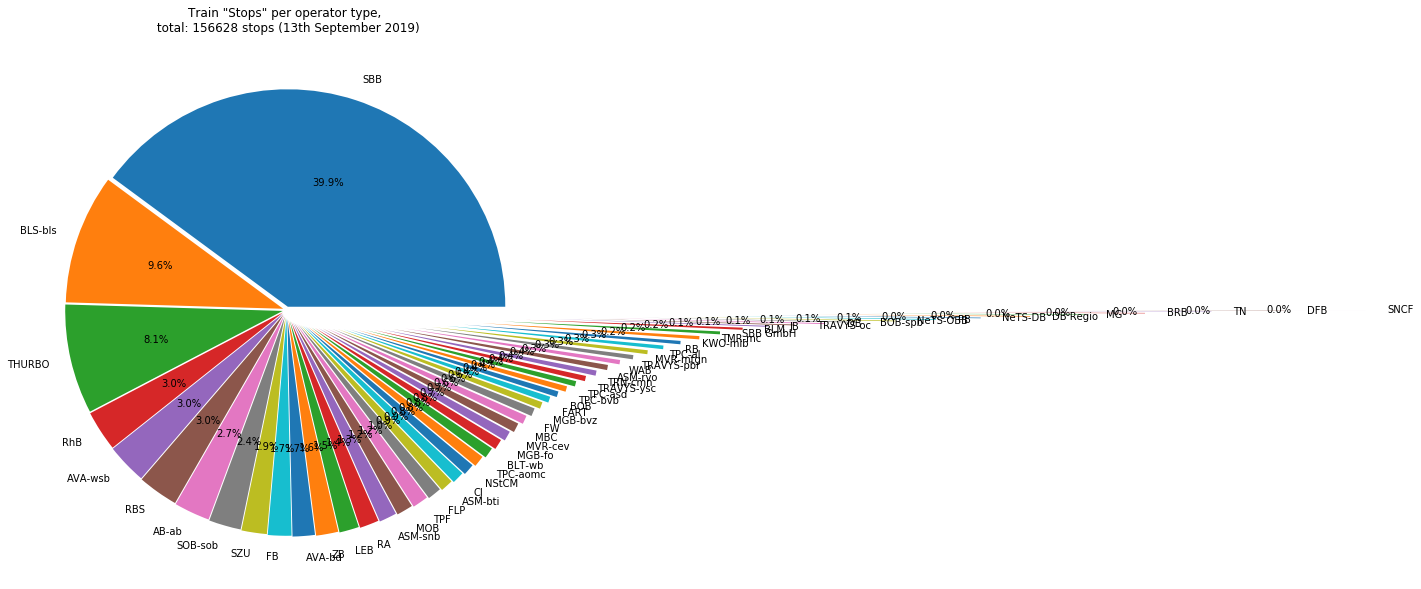

In [112]:
explode = list(np.true_divide(np.logspace(-1.2, 1.2, data_train['BETREIBER_ABK'].value_counts().shape[0]),4))
plot_value_counts_pie_chart(data_train['BETREIBER_ABK'], 'Train "Stops" per operator type')

In [11]:
# Keep only trains operated by SBB
data_train_SBB = data_train[data_train['BETREIBER_ABK']=='SBB']

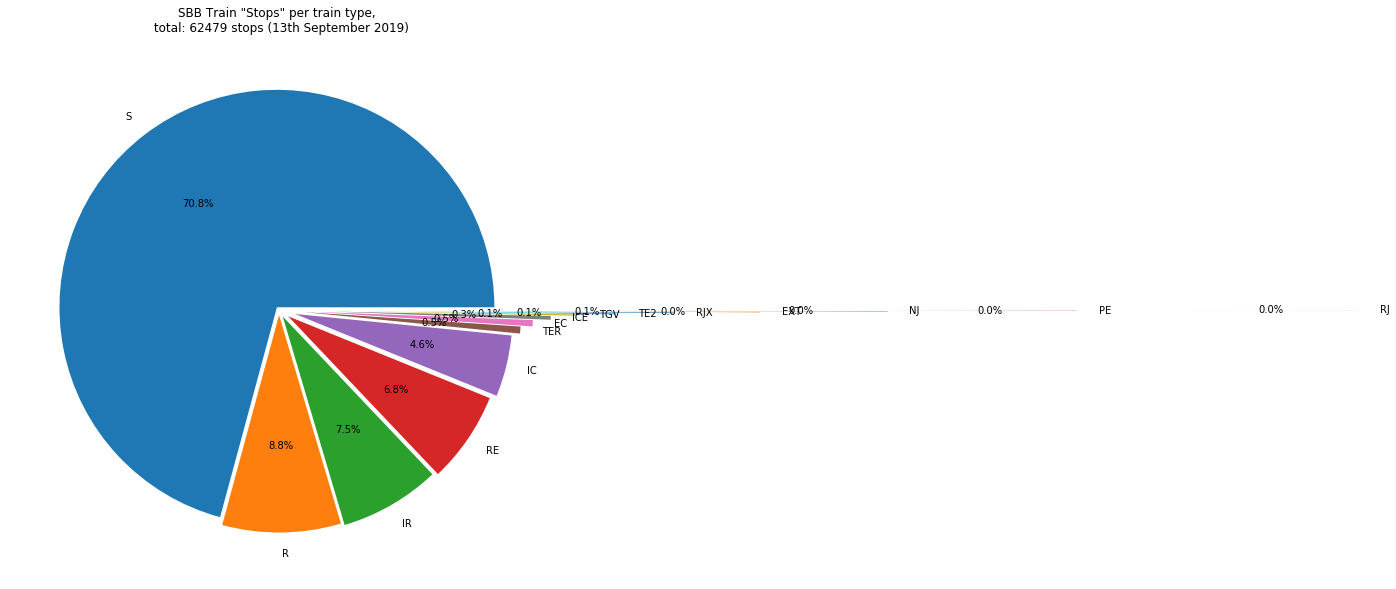

In [111]:
explode = list(np.true_divide(np.logspace(-1.2, 1.2, data_train_SBB['VERKEHRSMITTEL_TEXT'].value_counts().shape[0]),4))
plot_value_counts_pie_chart(data_train_SBB['VERKEHRSMITTEL_TEXT'], 'SBB Train "Stops" per train type')

In [13]:
# Keep only lonmg-distance SBB trains IC, RE and IR
data_train_SBB_ld = data_train_SBB[data_train_SBB['VERKEHRSMITTEL_TEXT'].isin(['IC','RE','IR'])]

In [14]:
# Take a look at the data, to understand its size
data_train_SBB_ld.describe(include='object')

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
count,11766,11766,11766,11766,11766,11766,11766,11766,0,11766,11766,10285,10097,11766,10299,10110,11766
unique,1,1546,1,1,1,1,1546,25,0,3,205,1308,9412,2,1305,9390,2
top,13.09.2019,85:11:1836:002,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1836,RE,NaN,IR,Zürich HB,13.09.2019 19:27,13.09.2019 15:45:25,REAL,13.09.2019 09:00,13.09.2019 17:40:44,REAL
freq,11766,20,11766,11766,11766,11766,20,4239,NaN,4680,722,20,4,9808,20,4,9857


In [16]:
data_train_SBB_ld.loc[data_train_SBB_ld['LINIEN_ID']=='1980']

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
26791,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8503000,Zürich HB,NaN,NaN,PROGNOSE,13.09.2019 17:36,13.09.2019 17:37:35,REAL,False
26792,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8503504,Baden,13.09.2019 17:51,13.09.2019 17:51:36,REAL,13.09.2019 17:52,13.09.2019 17:54:57,REAL,False
26793,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500309,Brugg AG,13.09.2019 18:00,13.09.2019 18:01:24,REAL,13.09.2019 18:02,13.09.2019 18:03:54,REAL,False
26794,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500305,Frick,13.09.2019 18:17,13.09.2019 18:18:29,REAL,13.09.2019 18:18,13.09.2019 18:20:58,REAL,False
26795,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500320,Stein-Säckingen,13.09.2019 18:24,13.09.2019 18:25:36,REAL,13.09.2019 18:25,13.09.2019 18:27:03,REAL,False
26796,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500301,Rheinfelden,13.09.2019 18:33,13.09.2019 18:34:32,REAL,13.09.2019 18:34,13.09.2019 18:36:15,REAL,False
26797,13.09.2019,85:11:1980:001,85:11,SBB,Schweizerische Bundesbahnen SBB,Zug,1980,IR36,NaN,IR,...,False,8500010,Basel SBB,13.09.2019 18:47,13.09.2019 18:48:20,REAL,NaN,NaN,PROGNOSE,False


## Data modeling

In [17]:
pd.options.mode.chained_assignment = None 
# Create delay at arrival and departure (DELAY_ and DELAY_AB) column - which is what we need for our analysis
data_train_SBB_ld['DELAY_AN'] = pd.to_datetime(
    data_train_SBB_ld['AN_PROGNOSE'],
    format="%d.%m.%Y %H:%M:%S") - pd.to_datetime(
        data_train_SBB_ld['ANKUNFTSZEIT'], format="%d.%m.%Y %H:%M")
data_train_SBB_ld['DELAY_AB'] = pd.to_datetime(
    data_train_SBB_ld['AB_PROGNOSE'],
    format="%d.%m.%Y %H:%M:%S") - pd.to_datetime(
        data_train_SBB_ld['ABFAHRTSZEIT'], format="%d.%m.%Y %H:%M")

In [18]:
# Check what the new columns looks like. We have timedelta, also sometimes negative. 
# This will have to be transformed to seconds in a later stage
data_train_SBB_ld['DELAY_AB'].describe()

count                     10110
mean     0 days 00:02:25.250148
std      0 days 00:03:00.257899
min           -1 days +23:59:42
25%             0 days 00:00:55
50%             0 days 00:01:32
75%             0 days 00:02:46
max             0 days 00:38:07
Name: DELAY_AB, dtype: object

In [20]:
# Total number of stations
n = len(data_train_SBB_ld['HALTESTELLEN_NAME'].unique())
print(n)

205


In [21]:
data_train_SBB_ld['HALTESTELLEN_NAME'].value_counts()

Zürich HB       722
Olten           417
Bern            359
Basel SBB       322
Lausanne        292
               ... 
Corgémont         1
Zollikofen        1
Oberkirch LU      1
Immensee          1
Cortébert         1
Name: HALTESTELLEN_NAME, Length: 205, dtype: int64

In [23]:
data = {'station': np.unique(data_train_SBB_ld['HALTESTELLEN_NAME'])} 

In [26]:
stations = pd.DataFrame(data, index = list(range(0,n)))

In [84]:
# Initialize a n*n transition matrix
s=(n,n)
matrix = pd.DataFrame(np.zeros(s))

# Initialize a n*1 initial station vector
t=(n)
Initial = pd.DataFrame(np.zeros(t))

In [85]:
# Loop over the word frequency data frame to calculate the initial vector and transition matrix
# It may take a few sec depends on the size of the dataframe

for route in (data_train_SBB_ld['LINIEN_ID'].unique()):
    stops = data_train_SBB_ld.loc[data_train_SBB_ld['LINIEN_ID']==route]['HALTESTELLEN_NAME']
    if len(stops)>1:
        pos_i = stations.loc[stations['station']==stops.iloc[0]].index[0]
        Initial.iloc[pos_i] += 1
    for j in range(len(stops)-1):
        pos1 = stations.loc[stations['station']==stops.iloc[j]].index[0]
        pos2 = stations.loc[stations['station']==stops.iloc[j+1]].index[0]
        matrix.iloc[pos1,pos2]+=1

In [86]:
Initial_dist = Initial.div(Initial.sum(axis=0),axis=1)
Initial_dist.columns = ['Prob']
Initial_dist['Station'] = data['station']

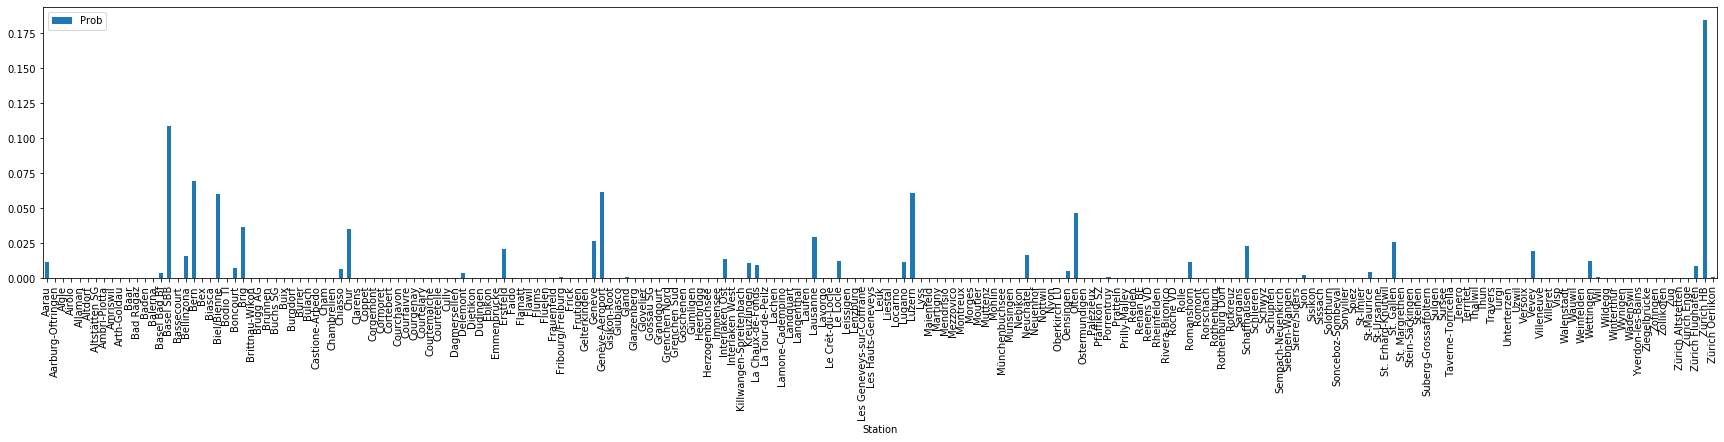

In [87]:
Initial_dist.plot.bar(x='Station', y='Prob', figsize=(30,5));

In [114]:
# Dead ends
for i in range(0, n):
    if matrix.sum(axis=1)[i] == 0:
        print(stations.iloc[i])

station    Rothenburg
Name: 143, dtype: object
station    Travers
Name: 177, dtype: object
station    Unterterzen
Name: 179, dtype: object


In [90]:
tran_matrix = matrix
tran_matrix.columns = data['station']
tran_matrix['Index'] = data['station']
tran_matrix = tran_matrix.set_index('Index')

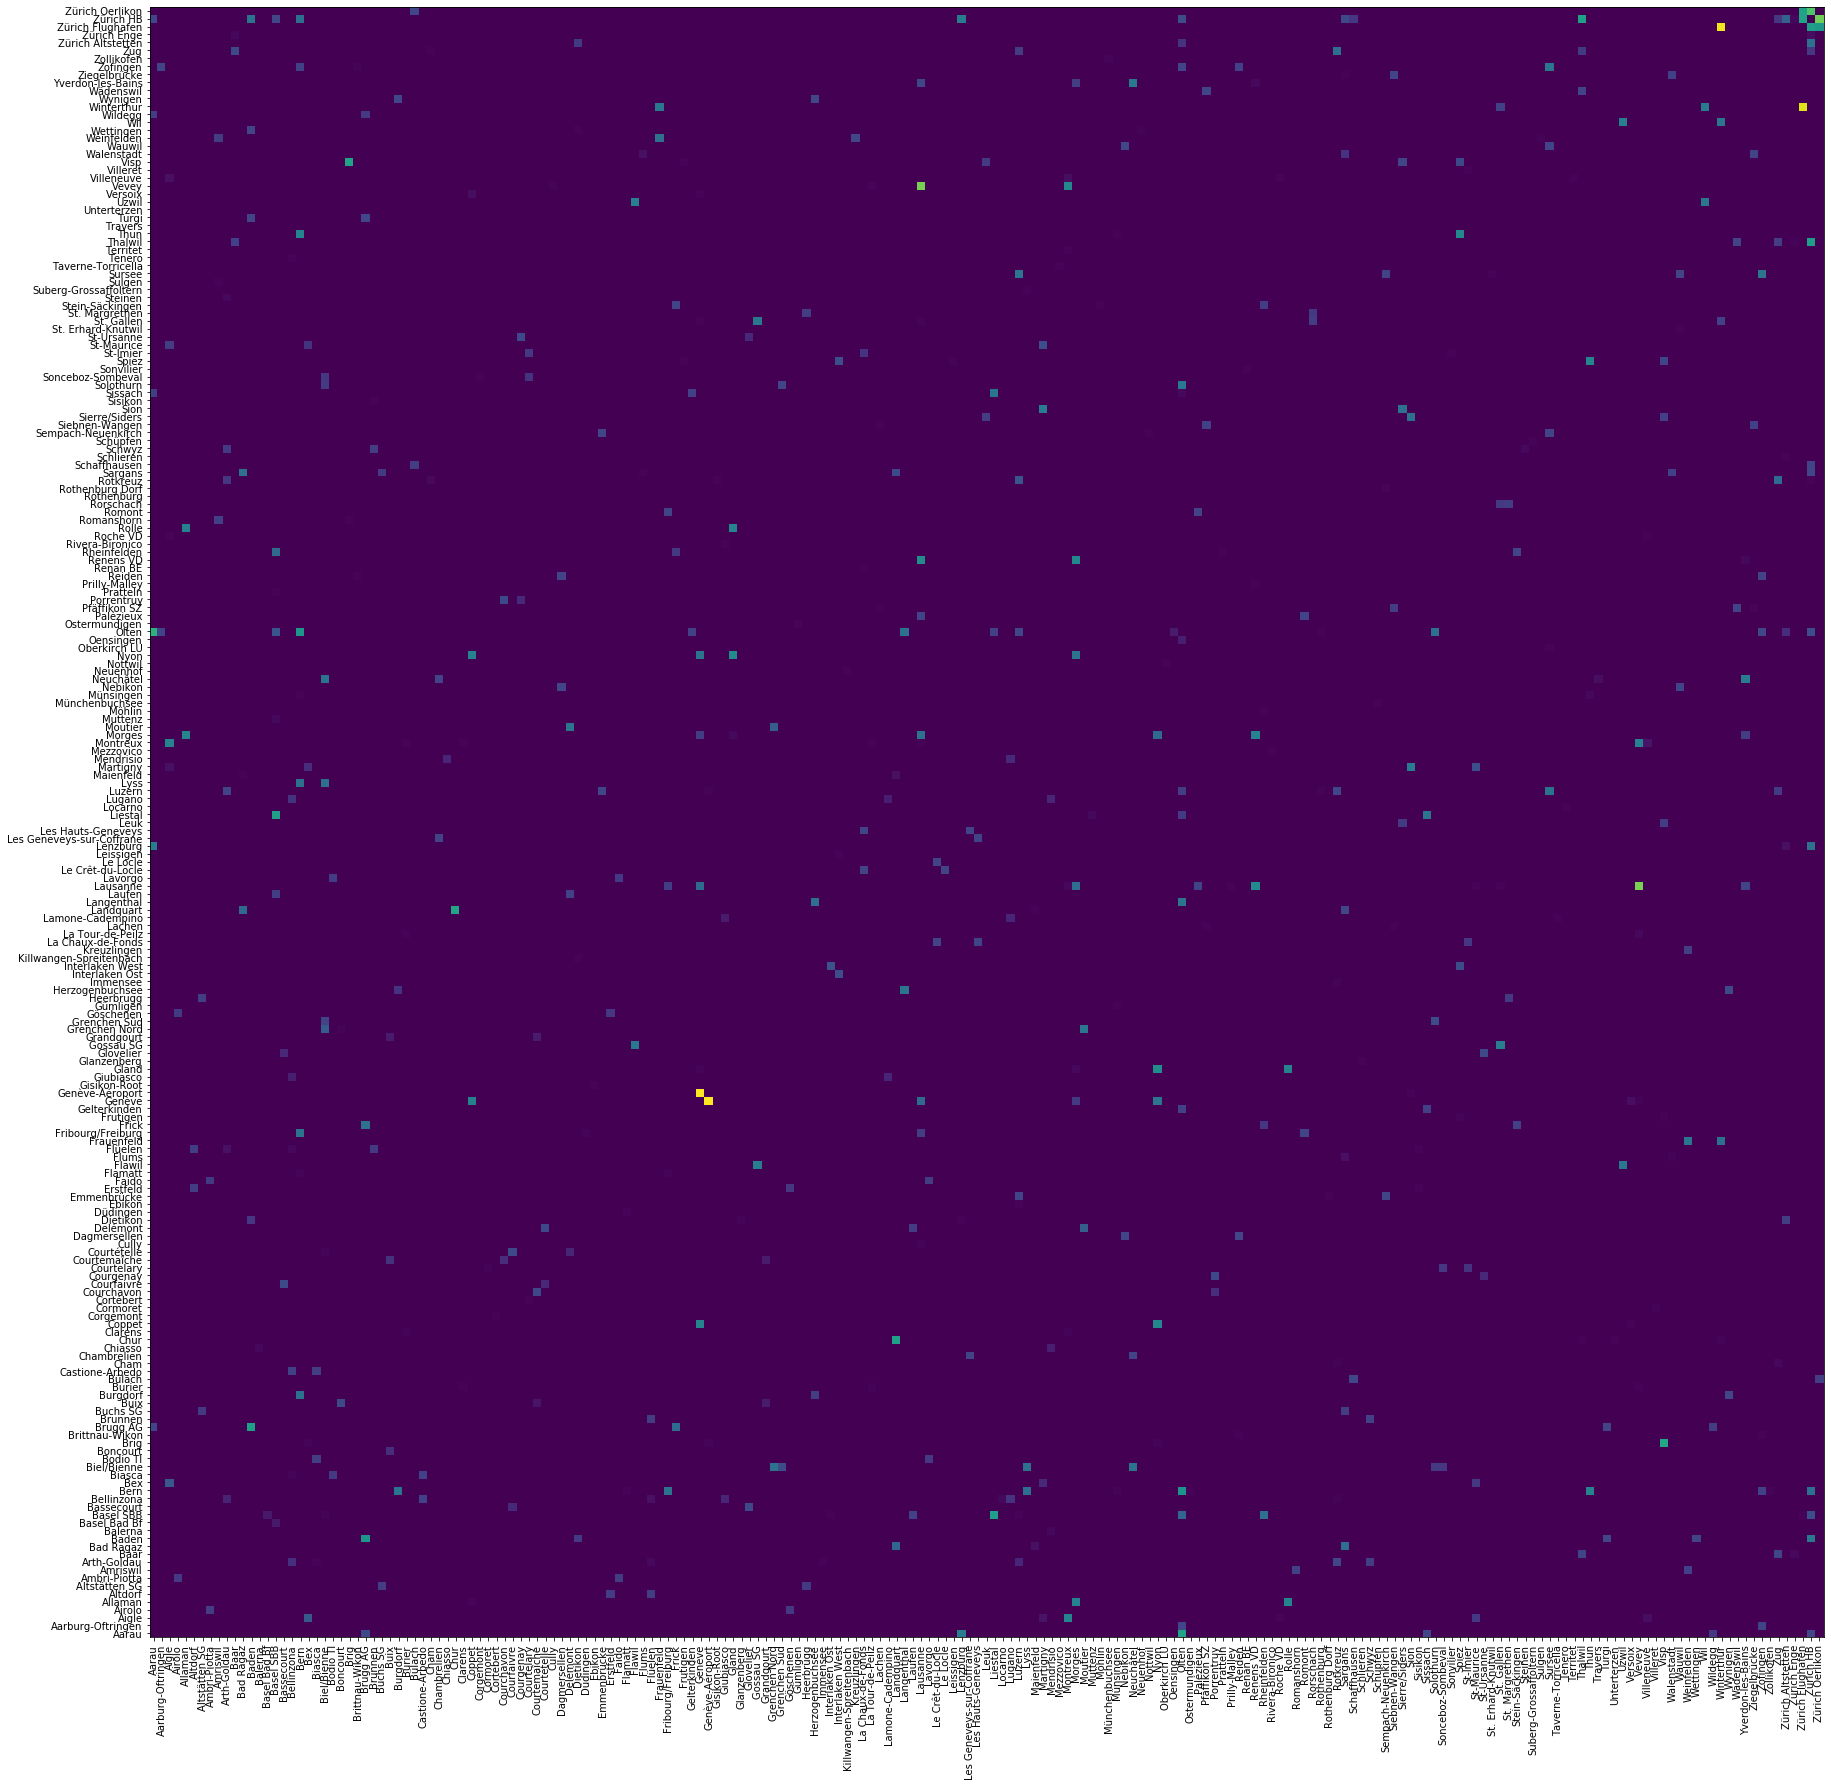

In [98]:
plt.figure(figsize=(30,30))
plt.pcolor(tran_matrix)
plt.yticks(np.arange(0.5, len(data['station']), 1), tran_matrix.index)
plt.xticks(np.arange(0.5, len(data['station']), 1), tran_matrix.columns, rotation='vertical')
plt.show()